In [1]:
#OmSriGaneshayaNamah
#OmSriSaraswatyaiNamah
#OmSriSaiRam

In [2]:
import pandas as pd
import numpy as np

ref: https://www.analyticsvidhya.com/blog/2021/09/web-traffic-forecasting-using-deep-learning/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [4]:
data = pd.read_csv('webtraffic.csv')

In [5]:
data.shape

(4896, 2)

In [6]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


Website traffic refers to web users who visit a website. Web traffic is measured in visits, sometimes called "sessions," and is a common way to measure an online business effectiveness at attracting an audience.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Hour Index  4896 non-null   int64
 1   Sessions    4896 non-null   int64
dtypes: int64(2)
memory usage: 76.6 KB


In [16]:
data['Sessions']

0       1418159421
1       1113769116
2        919158921
3        822352824
4        735526737
           ...    
4891    2555880561
4892    2454084459
4893    2405182410
4894    2356280361
4895    1987019991
Name: Sessions, Length: 4896, dtype: int64

In [15]:
data['Sessions'].values

array([1418159421, 1113769116,  919158921, ..., 2405182410, 2356280361,
       1987019991], dtype=int64)

In [17]:
type(data['Sessions'].values)

numpy.ndarray

In [18]:
type(data['Sessions'])

pandas.core.series.Series

In [10]:
len(data['Sessions'])

4896

In [11]:
len(data['Sessions'].values)

4896

In [19]:
sessions= data['Sessions'].values

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'hour')

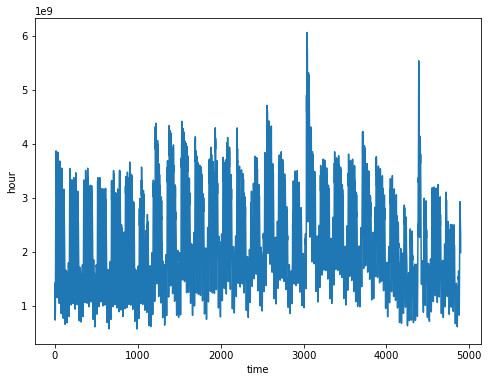

In [24]:
plt.figure(figsize=(8,6))
plt.plot(sessions)
plt.xlabel('time')
plt.ylabel('hour')

In [26]:
np.arange(len(sessions))

array([   0,    1,    2, ..., 4893, 4894, 4895])

Text(0, 0.5, 'No. of sessions')

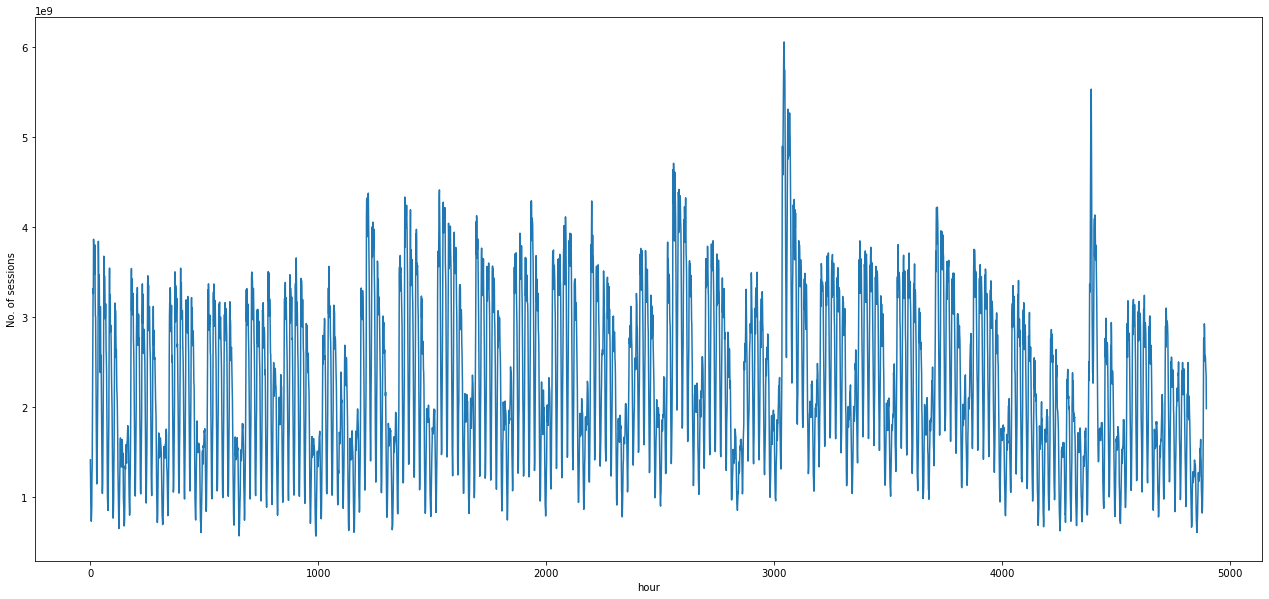

In [31]:
ar = np.arange(len(sessions))
plt.figure(figsize=(22,10))
plt.plot(ar, sessions)
plt.xlabel('hour')
plt.ylabel('No. of sessions')

In [28]:
sessions

array([1418159421, 1113769116,  919158921, ..., 2405182410, 2356280361,
       1987019991], dtype=int64)

In [34]:
sessions[:5]

array([1418159421, 1113769116,  919158921,  822352824,  735526737],
      dtype=int64)

In [38]:
week_samp = sessions[:168]

In [40]:
ar = np.arange(len(week_samp))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

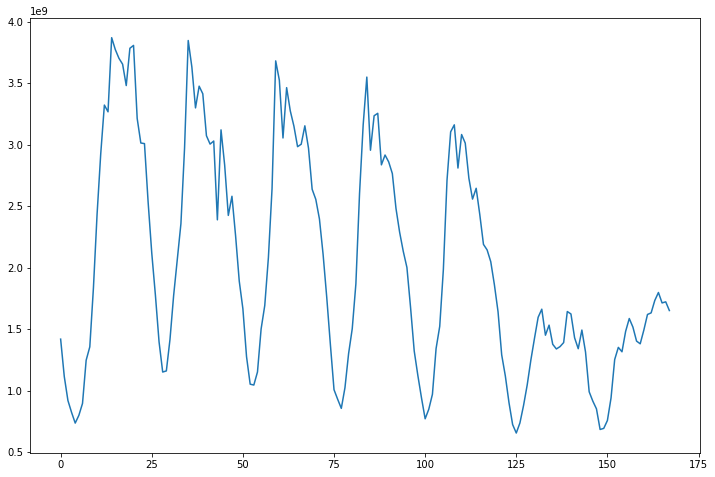

In [42]:
week_samp = sessions[:168]
ar = np.arange(len(week_samp))
plt.figure(figsize=(12,8))
plt.plot(ar, week_samp)

**data preparation for forecasting:** 
We will create inpute sequence. Let’s say this is a time series. Each cell would have some number or value. Let’s create sequences of length five, so the first five observations, will form the first sequence, and the sixth observation, this one will be treated as the target.

The second sequence will start from the second element, till the sixth element and the target will be the seventh element, as seen below

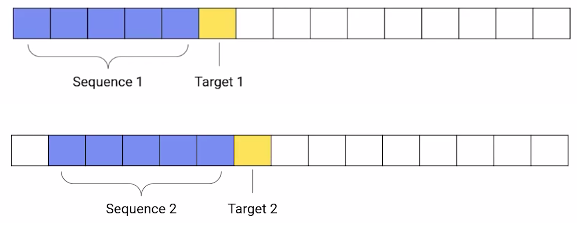

Now the subsequent sequences will be extracted, by moving this window, one step at a time.

In [ ]:
#create sequence

def prep_data(seq,num):
    x=[]
    y=[]
    for i in 